<h1><font face="times new" color='orangeblue'> <b><i><u>Habitudes de Pourboires : Analyse des Données de Restaurant




**Objectif typique :** L'ensemble de données "tips" est souvent utilisé pour illustrer des concepts d'analyse de données et de visualisation, en montrant comment les différentes variables peuvent être explorées et analysées. Il peut également être utilisé pour des exercices d'apprentissage automatique simples, tels que la prédiction du montant du pourboire en fonction d'autres variables.

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Données se trouvent dans Seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
# Importation du jeu de données *Tips*
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
#Structure de données
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


----------------------------------------

><h2><font face="consolas"
color='yellow'>  <b><i>Variables :




<font
color='orangeblue'>**total_bill :** </font> Montant total de la facture.

<font color='orangeblue'>**tip :**</font> Montant du pourboire.

<font color='orangeblue'>**sex :**</font> Sexe du payeur (male ou female).

<font color='orangeblue'>**smoker :**</font> Si la personne fume ou non (yes ou no).

<font color='orangeblue'>**day :** </font>Jour de la semaine (Thur, Fri, Sat, Sun).

<font color='orangeblue'>**time :** </font>Moment de la journée (Lunch ou Dinner).

<font color='orangeblue'>**size :**</font> Nombre de personnes à la table.

<h1><font face="cambria" color='yellow'> <b><i>Paramètres statistiques usuels

Il est très courant et simple de commencer une analyse des données en calculant des paramètres statistiques standard comme :

<b>Moyenne ;

Médiane ;

Minimum ;

Maximum ;

Mode ;

Etendue ;

Variance et Ecart-type.

In [7]:
# Pourboir moyen
tips_df['tip'].mean()

2.99827868852459

In [8]:
# Pourboir moyen
tips_df['tip'].median()

2.9

In [10]:
# Pourboir minimum
tips_df['tip'].min()

1.0

In [11]:
# Pourboir maximum
tips_df['tip'].max()

10.0

In [12]:
# Distribution de fréquence de la variable *tip*
tips_df['tip'].value_counts()

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: tip, Length: 123, dtype: int64

In [15]:
# Distribution de fréquence de la variable *time*
tips_df['time'].value_counts()
tips_df['time'].value_counts(normalize=True)  # %%

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [16]:
# Distribution de fréquence de la variable *day*
tips_df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [18]:
# Etendue de la variable *tip*
tips_df['tip'].max() - tips_df['tip'].min()

9.0

In [19]:
# Variance de la variable *tip*
tips_df['tip'].var()

1.914454638062471

In [20]:
# ecart-type de la variable *tip*
tips_df['tip'].std()

1.3836381890011822

In [22]:
tips_df['tip'].std() == (tips_df['tip'].var())**0.5

True

In [23]:
# Table de statistiques descriptives
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [29]:
tips_df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [34]:
# Les Quartiles de variable *total_bill* : méthod .quantile()
print('1 ére quartile :', tips_df['total_bill'].quantile(0.25))
print('2 éme quartile :', tips_df['total_bill'].quantile(0.5))
print('3 éme quartile :', tips_df['total_bill'].quantile(0.75))

1 ére quartile : 13.3475
2 éme quartile : 17.795
3 éme quartile : 24.127499999999998


In [35]:
# Les Quartiles de variable *total_bill* : fonction quantile() de numpy
print('1 ére quartile :', np.quantile(tips_df['total_bill'], 0.25))
print('2 éme quartile :', np.quantile(tips_df['total_bill'], 0.5))
print('3 éme quartile :', np.quantile(tips_df['total_bill'], 0.75))

1 ére quartile : 13.3475
2 éme quartile : 17.795
3 éme quartile : 24.127499999999998


In [36]:
# Les Quartiles de variable *total_bill* : fonction percentile() de numpy
print('1 ére quartile :', np.percentile(tips_df['total_bill'], 25))
print('2 éme quartile :', np.percentile(tips_df['total_bill'], 50))
print('3 éme quartile :', np.percentile(tips_df['total_bill'], 75))

1 ére quartile : 13.3475
2 éme quartile : 17.795
3 éme quartile : 24.127499999999998


In [38]:
# Toutes les quartiles en une seule ligne de code
np.quantile(tips_df['total_bill'], [0.25, 0.5, 0.75])

array([13.3475, 17.795 , 24.1275])

In [40]:
# On peut aussi calculer des quintiles
np.quantile(tips_df['total_bill'], [0.2, 0.4, 0.6, 0.8, 1])

array([12.636, 16.222, 19.818, 26.098, 50.81 ])

In [41]:
# IQR de la variable *total_bill*
tips_df['total_bill'].quantile(0.75) - tips_df['total_bill'].quantile(0.25)

10.779999999999998

In [42]:
# Importation du module stats
from scipy import stats

# IQR de la variable *total_bill*
stats.iqr(tips_df['total_bill'])

10.779999999999998

In [51]:
# DataFrame des clients du samedi et Dimanche (filtration)
sat_sun_df=tips_df[(tips_df.day== 'Sat') | (tips_df.day== 'Sun')]
sat_sun_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [53]:
# Consomation moyenne et mediane des clients du weekend

sat_sun_df.groupby('day')['total_bill'].agg(['mean', 'median'])

,mean,median
day,,
Thur,NaN,NaN
Fri,NaN,NaN
Sat,20.441379,18.24
Sun,21.410000,19.63


<h1><font face="cambria" color='yellow'> <b><i><u>Graphiques
Basiques pour Decrire Chaque Variable

In [54]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<h1><font face="cambria" color='orangeblue'> <b><i><u>Histogrammes

<h3><font face="cambria" color='orange'> <b><i><u>Les histogrammes</font><font face="Cambria"> sont utilisés pour visualiser la distribution des variables quantitatives continues.</u>

<font size=4>Dans cette partie on va voir :

<font size=4>**1- calculer des paramètres statistiques pour décrire une variable ;**

<font size=4>**2- construire un histogramme pour représenter la distribution d'une variable ;**

<font size=4>**3- décrire la distribution d'une variable en se basant sur son histogramme.**

<ipython-input-62-ebfd42e7c81e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips_df['total_bill'], kde=False).set_title('Consomation Total');


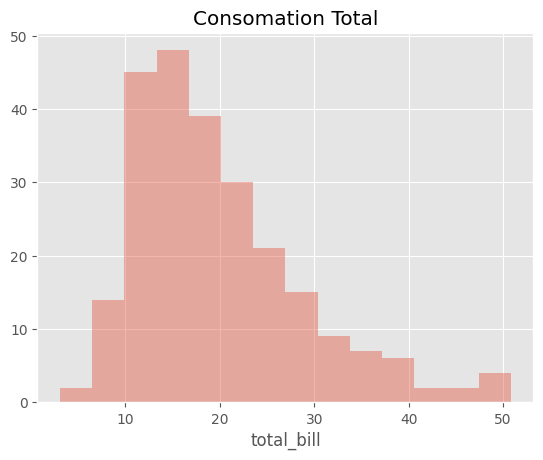

In [62]:
# Histogramme du montant total de la Consomation
sns.distplot(tips_df['total_bill'], kde=False).set_title('Consomation Total');

Kde=False -----> N'est pas afficher la densité de proba

<ipython-input-59-c28ed3830135>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips_df['total_bill'], kde=False, bins=20).set_title('Consomation Total');


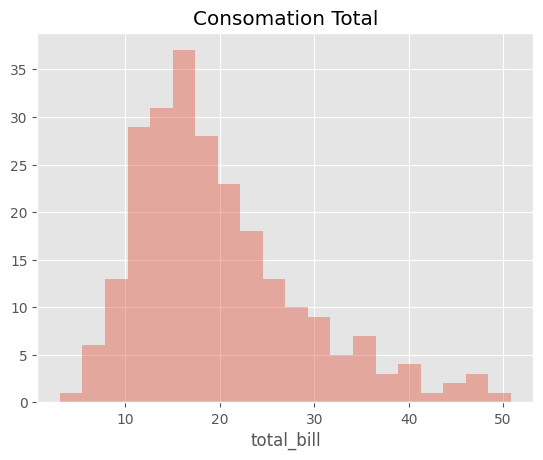

In [59]:
# Histogramme du montant total de la Consomation
sns.distplot(tips_df['total_bill'], kde=False, bins=20).set_title('Consomation Total');

En ordonnée, on a la fréquence c'est-à-dire le nombre de fois d'occurence d'une valeur. En abscisse, on a les valeurs de la variable.

Vous pouvez aussi choisir de représenter uniquement la densité de probabilité et non l'histogramme ou les deux ensemble.

<ipython-input-63-c566fc0b1b63>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips_df['total_bill'], hist=False, bins=20).set_title('Consomation Total');


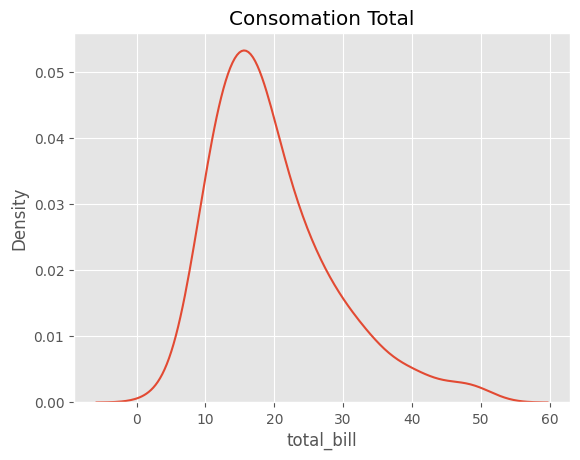

In [63]:
# Densité de Proba du montant total de la Consomation
sns.distplot(tips_df['total_bill'], hist=False, bins=20).set_title('Consomation Total');

<ipython-input-64-c52d7d55a8c5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips_df['total_bill']).set_title('Consomation Total');


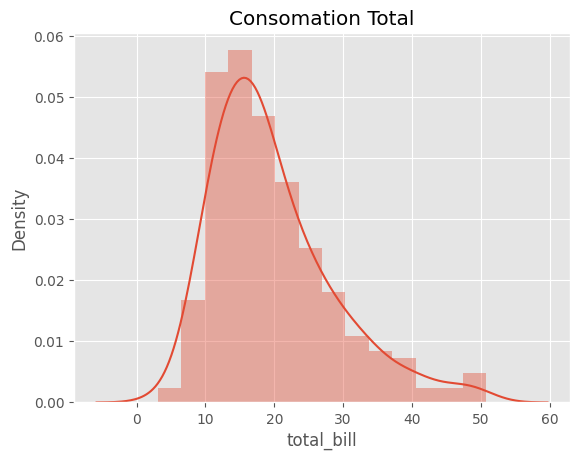

In [64]:
# Histogramme & Densité de Proba du montant total de la Consomation
sns.distplot(tips_df['total_bill']).set_title('Consomation Total');


<h3><font face="cambria" color='orangeblue'> <b><i><u>Description d'un histogramme</font></u></b>

Pour décrire un histogramme, vous devez faire ressortir nécessairement 4 aspects importants :

**# forme de l'histogramme :** c'est l'apparence globale de l'histogramme. Vous devez dire si elle est symétrique, en forme de cloche (loi normale), asymétrique positive (c'est-à-dire forme étalée vers la droite) ou asymétre négative (c'est-à-dire forme étalée vers la gauche.) ;

**# centre de la distribution** : médiane ;

**# dispersion des valeurs :** à ce niveau, vous devez interpréter la variabilité dans les données en utilisant la variance, l'écart-type ou l'IQR ;

**# outliers (en Anglais) ou valeurs abérantes :** ce sont des valeurs dui sortent du lot c'est-à-dire qui sont très loin du centre de gravité des données.

Avant de décrire la distribution de la consommation totale, faisons un petit rappel sur la loi normale.

<ipython-input-67-cc596f6331cf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.normal(size=10000), kde=True).set_title('Distribution Normale')


Text(0.5, 1.0, 'Distribution Normale')

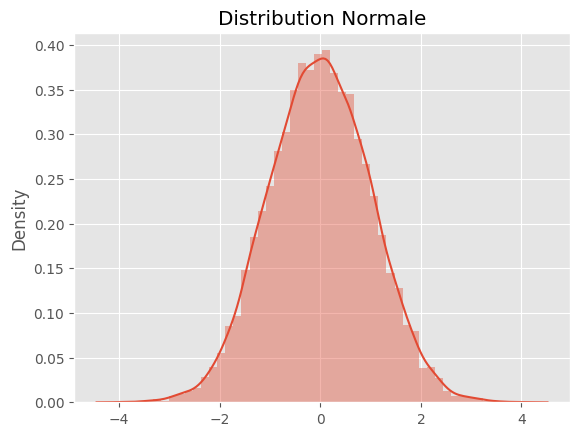

In [67]:
# Exemple de distribution normale
sns.distplot(np.random.normal(size=10000), kde=True).set_title('Distribution Normale')

Quelques caractéristiques d'une distribution normale :

<font face="cambria" color='pink'>**forme en cloche** ;

<font color='pink'>**distribution symétrique (donc le coefficient d'asymétrie est égal à 0)** ;

<font color='pink'>**La moyenne est égale à la médiane** ;

Etc.

##Voici une description de la distribution de la consommation totale dans le restaurant :

La distribution de la consommation totale dans ce restaurant est unimodale et asymétrique vers la droite centrée à environ 15 u.m (unité de monnaie) avec la plupart des données entre 2 et 50 et apparemment aucune valeur aberrante.

Lorsque vous combinez les statistiques descriptives et l'histogramme, vous pouvez décrire de manière plus précise la distribution du montant total de la consommation dans ce restaurant :

La distribution du montant total de la consommation dans ce restaurant est unimodale et asymétrique vers la droite , centrée à 17,795 u.m avec la plupart des valeurs entre 13,35 u.m (1er quartile) et 24,13 u.m (3è quartile) et apparemment aucune valeur aberrante.

Remarquez l'utilisation du 1er quartile et du 3è quartile plutôt que de la simple étendue (minimum et maximum). En effet, en face d'une distribution asymétrique, il est conseillé d'utilisé l'IQR dans la description plutôt que d'utiliser l'étendue. Par ailleurs, l'IQR est plus robuste aux valeurs abérantes que l'étendue. La médiane est aussi plus robuste aux valeurs abérantes que la moyenne.

L'IQR est souvent utilisé dans l'analyse de la dispersion des données, en particulier dans la construction de boîtes à moustaches (box plots). Les valeurs situées en dehors de

Q1−1.5×IQR en bas //     Q3+1.5×IQR en haut

peuvent être considérées comme des valeurs aberrantes ou des points extrêmes.

In [68]:
# Importation du module stats de Scipy
from scipy import stats

# Fonction pour trouver les outliers
def finding_outliers(data, var_name):
  # calcul de iqr
  iqr=stats.iqr(data[var_name])
  q1=data[var_name].quantile(0.25)
  q3=data[var_name].quantile(0.75)

  #calcul de Q1-1.5xIQR et Q3+1.5xIQR
  lower=q1-1.5*iqr
  upper=q3+1.5*iqr

  # dataframe des valeurs aberrantes
  outliers_df=data[(data[var_name]<lower) | (data[var_name]>upper)]

  return outliers_df

In [69]:
# les valeurs aberrantes du variable indiquants
finding_outliers(data=tips_df, var_name='tip')

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


<h1><font face="cambria" color='yellow'> <b><i><u>Boites à Moustaches

Text(0.5, 1.0, 'Montant des pourboires')

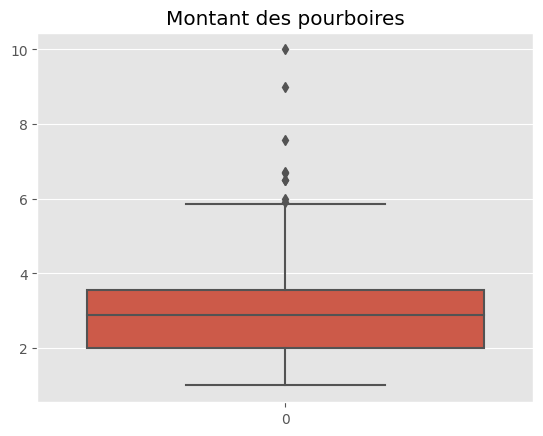

In [75]:
# Boites à Moustaches du montant des pourboires
sns.boxplot(tips_df['tip']).set_title('Montant des pourboires')

Text(0.5, 1.0, 'Consommation Total')

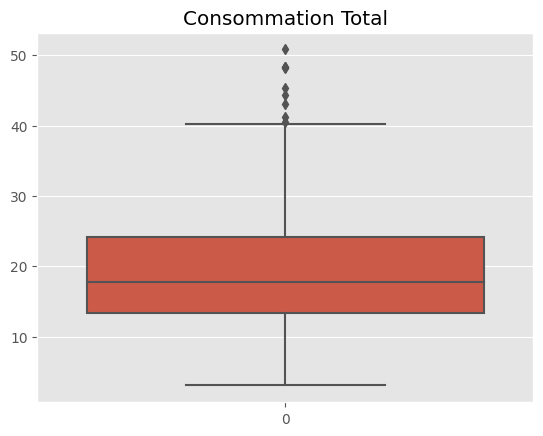

In [79]:
# Boites à Moustaches du montant des pourboires
sns.boxplot(tips_df['total_bill']).set_title('Consommation Total')

<h1><font face="cambria" color='yellow'> <b><i><u>Diagrammes à Barres et Circulaires

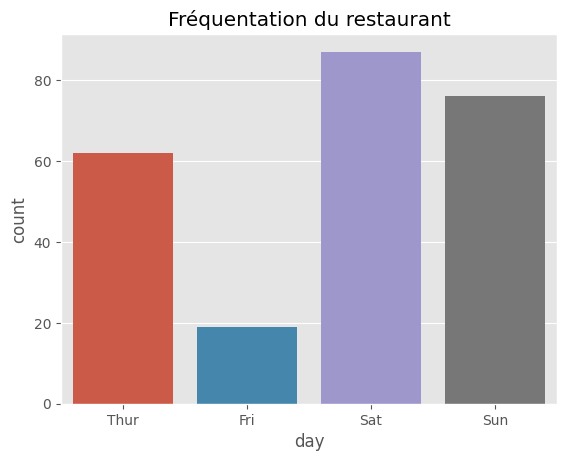

In [85]:
# Diagramme à Barre de la variable *day*
sns.countplot(x=tips_df['day']).set_title('Fréquentation du restaurant');

Text(0.5, 1.0, 'Fréquentation du restaurant')

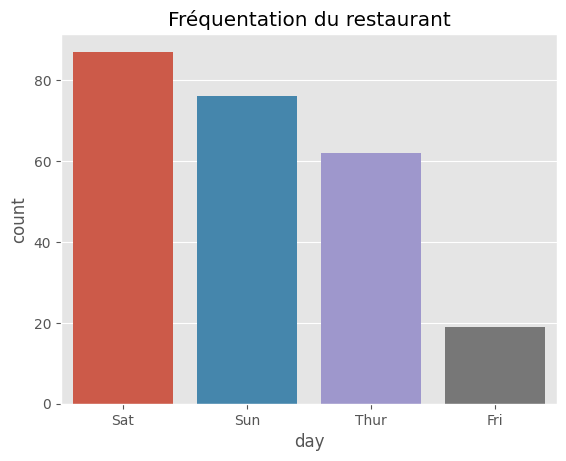

In [93]:
# Diagramme à Barre de la variable *day* (order decroit)
sns.countplot(x=tips_df['day'], order = tips_df['day'].value_counts().index)
plt.title('Fréquentation du restaurant')

Text(0.5, 1.0, 'Fréquentation du restaurant')

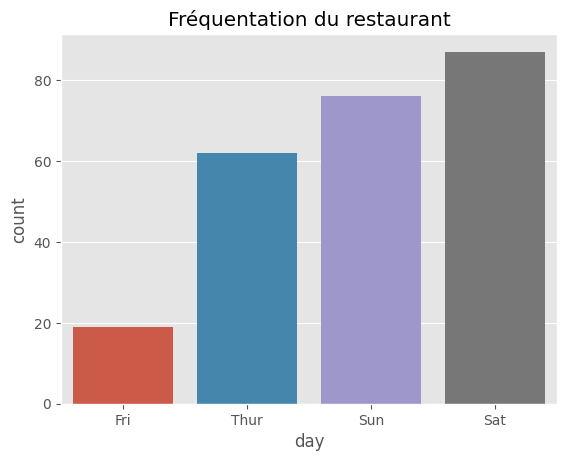

In [96]:
# Diagramme à Barre de la variable *day* (order decroit)
sns.countplot(x=tips_df['day'], order = tips_df['day'].value_counts(ascending=True).index)
plt.title('Fréquentation du restaurant')

<Axes: ylabel='time'>

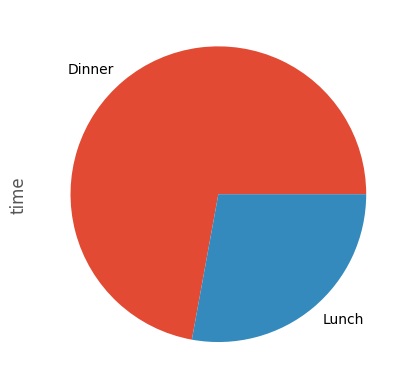

In [98]:
# Diagramme circulaire de la variable *time*
tips_df['time'].value_counts().plot(kind='pie')

#Fin